# Color Histograms in Image Retrieval

1) Link to the Youtube tutorial video: https://www.youtube.com/watch?v=I3na13AESjw&list=PLIUOU7oqGTLhF5CrFLaAWKuA0LoFWtpQj&index=3
2) Link to the tutorial website: https://www.pinecone.io/learn/series/image-search/color-histograms/

3) <img src="hidden\photo13.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />
4) <img src="hidden\photo14.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

# Understand the concept of color channels and pixel

To create our histograms we first need images. Feel free to use any images you like, but, if you’d like to follow along with the same images, you can download them using HuggingFace Datasets.

In [105]:
from datasets import load_dataset  # !pip install datasets

data = load_dataset('pinecone/image-set', split='train', revision='e7d39fc')

Found cached dataset json (C:/Users/weiyo/.cache/huggingface/datasets/pinecone___json/pinecone--image-set-667f08e2a994ecc3/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)


Inside the image_bytes feature of this dataset we have base64 encoded representations of 21 images. We decode them into OpenCV compatible Numpy arrays like so:

In [106]:
from base64 import b64decode
import cv2
import numpy as np

def process_fn(sample):
    image_bytes = b64decode(sample['image_bytes'])
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
    return image

# The decoded images are stored in the variable images
images = [process_fn(sample) for sample in data] 

We can display the decoded images with matplotlib

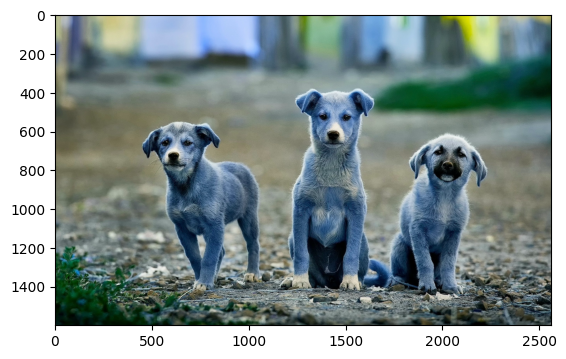

In [107]:
import matplotlib.pyplot as plt

# Show the 1st image of the dataset
plt.imshow(images[0])

1) The three dogs on the image above look strangely blue; that’s not intentional. 
2) OpenCV loads images in a Blue Green Red (BGR) format. 
3) However, Matplotlib expected RGB. 
4) So we must flip the color channels of the array (from BGR format to RGB format) to get the true color image.
5) <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 500px;"/>  <br />

In [108]:
# The variable shape stores the shape of the image called images[0]
shape = images[0].shape
print(f"*****Before flipping the color channels*****")
print(f"The shape of the image[0]={shape}. It means the image has dimension of {shape[0]} x {shape[1]} pixels, with {shape[2]} channels.")

# Print the shape of the 1st pixel (the top leftmost pixel) of the image called images[0]
print(f"The shape of the 1st pixel (the top leftmost pixel) of the image called images[0] is {images[0][0, 0, :]}.")
print(f"This means the 1st pixel has a pixel value of {images[0][0, 0, :][0]} at the Blue channel, a pixel value of {images[0][0, 0, :][1]} at the Green channel, a pixel value of {images[0][0, 0, :][2]} at the Red channel.")

*****Before flipping the color channels*****
The shape of the image[0]=(1600, 2560, 3). It means the image has dimension of 1600 x 2560 pixels, with 3 channels.
The shape of the 1st pixel (the top leftmost pixel) of the image called images[0] is [165 174 134].
This means the 1st pixel has a pixel value of 165 at the Blue channel, a pixel value of 174 at the Green channel, a pixel value of 134 at the Red channel.


In [109]:
import numpy as np

# Flip the color channels of the array (from BGR format to RGB format)
rgb_image = np.flip(images[0], 2)

rgb_shape = rgb_image.shape
print(f"*****After flipping the color channels*****")
print(f"The shape of the image[0]={rgb_shape}. It means the image has dimension of {rgb_shape[0]} x {rgb_shape[1]} pixels, with {rgb_shape[2]} channels. The shape of the image before and after flipping the color channels are same.")

# Print the shape of the 1st pixel (the top leftmost pixel) of the image called images[0]
print(f"The shape of the 1st pixel (the top leftmost pixel) of the image called images[0] is {rgb_image[0, 0, :]}.")
print(f"This means the 1st pixel has a pixel value of {rgb_image[0, 0, :][0]} at the Red channel, a pixel value of {rgb_image[0, 0, :][1]} at the Green channel, a pixel value of {rgb_image[0, 0, :][2]} at the Blue channel.")

*****After flipping the color channels*****
The shape of the image[0]=(1600, 2560, 3). It means the image has dimension of 1600 x 2560 pixels, with 3 channels. The shape of the image before and after flipping the color channels are same.
The shape of the 1st pixel (the top leftmost pixel) of the image called images[0] is [134 174 165].
This means the 1st pixel has a pixel value of 134 at the Red channel, a pixel value of 174 at the Green channel, a pixel value of 165 at the Blue channel.


1) Note that above, while the shape of the array has remained the same, the three values have reversed order. Those three values are the BGR-to-RGB channel values for a single pixel in the image. 
2) As shown, after flipping the order of these channels, we can display the true color image.

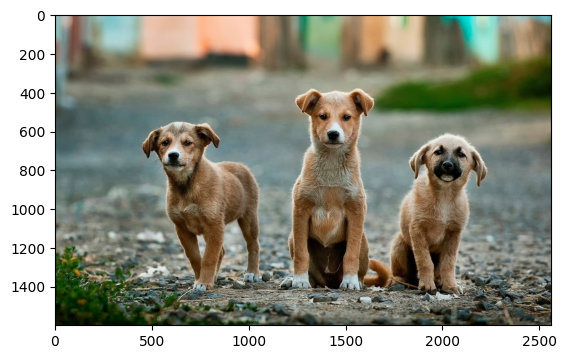

In [110]:
# Show the 1st image of the dataset, after flipping its color channels
plt.imshow(rgb_image)

# Understand color histogram step-by-step with Numpy

1) To help us understand how an image is transformed into a color histogram we will work through a step-by-step example using Numpy. We already have our Numpy arrays. 
2) For the first image, we can see the three BGR color values at pixel zero (the 1st pixel = the top leftmost pixel) with:

In [111]:
# The three BGR color values at pixel zero (the 1st pixel = the top leftmost pixel)
print(f"The three BGR color values at pixel zero (the 1st pixel = the top leftmost pixel) of the image[0] is {images[0][0, 0, :]}.")


The three BGR color values at pixel zero (the 1st pixel = the top leftmost pixel) of the image[0] is [165 174 134].


Every pixel in each image has three BGR color values like this that range on a scale of 0 (no color) to 255 (max color). Using this concept, we can manually create RGB arrays to display colors with Matplotlib (because Matplotlib works on RGB concept) like so:

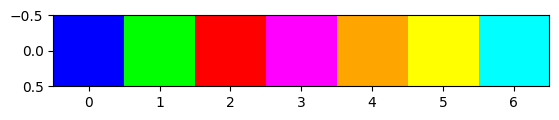

In [112]:
blue = [0, 0, 255] # As a pixel, it's pixel values on R, G, and B channels are 0, 0, and 255 respectively
green = [0, 255, 0] # As a pixel, it's pixel values on R, G, and B channels are 0, 255, and 0 respectively
red = [255, 0, 0] # As a pixel, it's pixel values on R, G, and B channels are 255, 0, and 0 respectively
violet = [255, 0, 255] # As a pixel, it's pixel values on R, G, and B channels are 255, 0, and 255 respectively
orange = [255, 165, 0] # As a pixel, it's pixel values on R, G, and B channels are 255, 165, and 0 respectively
yellow = [255, 255, 0] # As a pixel, it's pixel values on R, G, and B channels are 255, 255, and 0 respectively
cyan = [0, 255, 255] # As a pixel, it's pixel values on R, G, and B channels are 0, 255, and 255 respectively

# Make the 7 manaully created RBG arrays above together as an array
colors = np.asarray([[blue, green, red, violet, orange, yellow, cyan]])

# Show the array
plt.imshow(colors)

<img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 800px;"/>  <br />

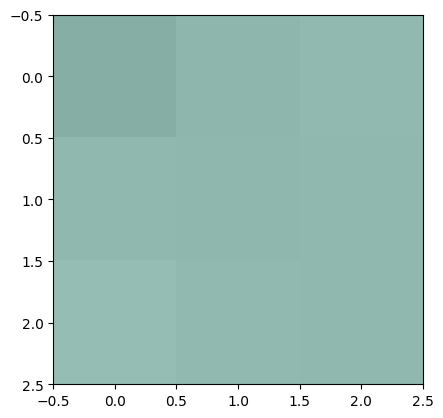

In [113]:
# Show the color of the pixels whose coordinates are (0,0), (0,1), (0,2),(1,0), (1,1), (1,2), (2,0), (2,1), and (2,2) respectively [the 9 pixels at the top left region]  
plt.imshow(rgb_image[:3, :3, :])

<img src="hidden\photo3.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

1) The vector refers to a 1D vector; the array refers to a NxM vector.
2) **Explanation of the wildcard (-1) usage in reshape()**
    1) For example, you have total 6 numbers in a single row (1D array). You want to reshape them into a 2D array of 2x3 dimension. You can do this by having the command -> input_array.reshape(2,-1). It is the same as input_array.reshape(2,3), because the -1 is used to let reshape() to work on the only possibility that can have after you providing enough dimension information. Hence, you cannot provide -1 more than once, else you will get error.
    2) <img src="hidden\photo4.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [114]:
# Reshape the rows and columns of the image array into a single row (means concatenate the pixels at each row in row-by-row manner [all the pixels at 2nd row will be concatenated right after the ones of the 1st row, and vice versa.])
image_vector = rgb_image.reshape(1, -1, 3)

print(f"After reshaping the image into a single row, the image has shape of {image_vector.shape}.\nThis means now the image still has total {image_vector.shape[1]} pixels, each pixel has {image_vector.shape[2]} channels/values.")
print(f"This also means now all the image pixels, {rgb_image.shape[0]}*{rgb_image.shape[1]}={image_vector.shape[1]} pixels, have been reshaped as a single row.")


After reshaping the image into a single row, the image has shape of (1, 4096000, 3).
This means now the image still has total 4096000 pixels, each pixel has 3 channels/values.
This also means now all the image pixels, 1600*2560=4096000 pixels, have been reshaped as a single row.


We can see that the top left three pixels are still the same (having the same color):

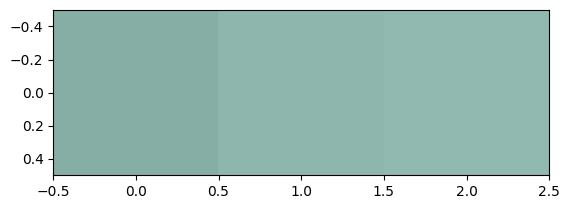

In [115]:
# Show the color of the top left 3 pixels
plt.imshow(image_vector[:, :3, :])

Even now, we still don’t have a “vector” because there are three color channels. We must extract those into their own vectors (and later during comparison we will concatenate them to form a single vector).

In [116]:
# For each pixel, extract the pixel value at its 1st channel (R channel)
red = image_vector[0, :, 0]
# For each pixel, extract the pixel value at its 2nd channel (G channel)
green = image_vector[0, :, 1]
# For each pixel, extract the pixel value at its 3rd channel (B channel)
blue = image_vector[0, :, 2]

print(f"The image has total {image_vector.shape[1]} pixels as a single row, each pixel has {image_vector.shape[2]} channels/values.")
print(f"There are total {red.shape[0]} R channel pixels extracted, as a single row, from the image.")
print(f"There are total {green.shape[0]} G channel pixels extracted, as a single row, from the image.")
print(f"There are total {blue.shape[0]} B channel pixels extracted, as a single row, from the image.")


The image has total 4096000 pixels as a single row, each pixel has 3 channels/values.
There are total 4096000 R channel pixels extracted, as a single row, from the image.
There are total 4096000 G channel pixels extracted, as a single row, from the image.
There are total 4096000 B channel pixels extracted, as a single row, from the image.


Now we visualize each color channel with a historgram. For each histogram, the x-axis represent the pixel value while the y-axis represents the total number of pixel has that value. We use 256 bins to represent each value on the x-axis because each color channel pixel has value range from 0 to 255 (total 256 steps).

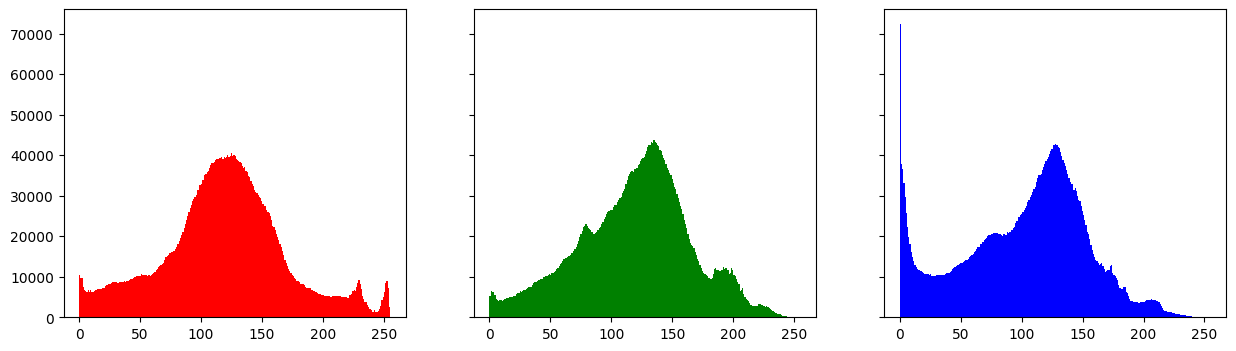

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# Plot the histogram for the Red channel
axs[0].hist(red, bins=256, color='r')
# Plot the histogram for the Green channel
axs[1].hist(green, bins=256, color='g')
# Plot the histogram for the BLue channel
axs[2].hist(blue, bins=256, color='b')
plt.show()

<img src="hidden\photo5.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

In [118]:
# Define a function to build and disply the histograms for red, green, and blue channels respectively of a given image
def build_histogram(image, bins=256):
    # convert from BGR to RGB
    rgb_image = np.flip(image, 2)
    # show the image
    plt.imshow(rgb_image)
    # convert to a vector
    image_vector = rgb_image.reshape(1, -1, 3)
    # break into given number of bins (the size of each bin)
    div = 256 / bins
    bins_vector = (image_vector / div).astype(int)
    # get the pixels at red, green, and blue channels respectively
    red = bins_vector[0, :, 0]
    green = bins_vector[0, :, 1]
    blue = bins_vector[0, :, 2]
    # build and display the histograms for red, green, and blue channels respectively
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    axs[0].hist(red, bins=bins, color='r')
    axs[1].hist(green, bins=bins, color='g')
    axs[2].hist(blue, bins=bins, color='b')
    plt.show() # show the plot

We can apply this build_histogram() to a few images to get an idea of how the color profile of an image can change the histograms.

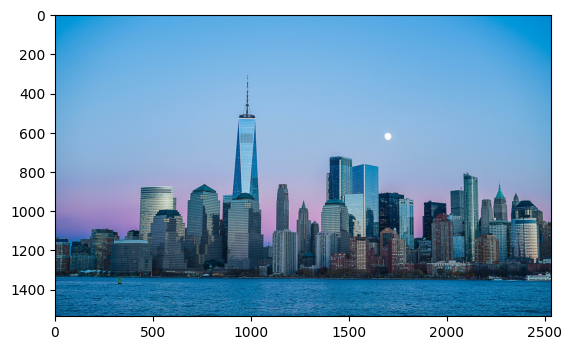

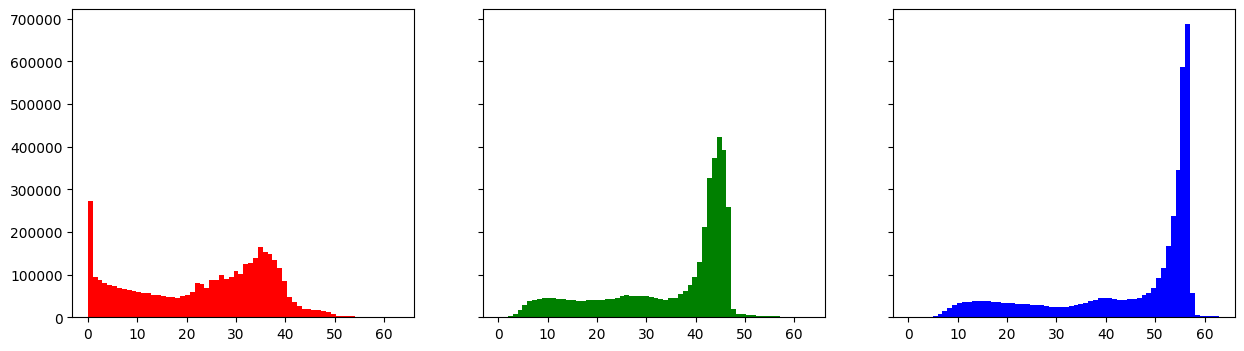

In [119]:
# we will see a lot of blue in this image, and it shows as high counts in *high* values in the blue histogram
build_histogram(images[1], 64)

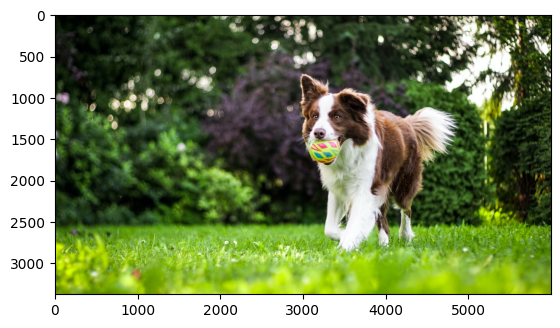

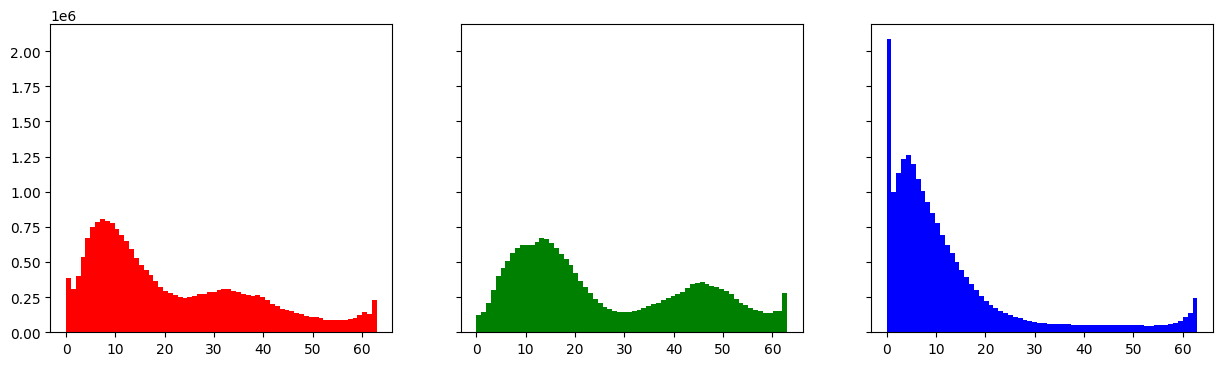

In [120]:
# very little blue in this image, and it shows as high counts in *low* values of the blue histogram
build_histogram(images[2], 64)

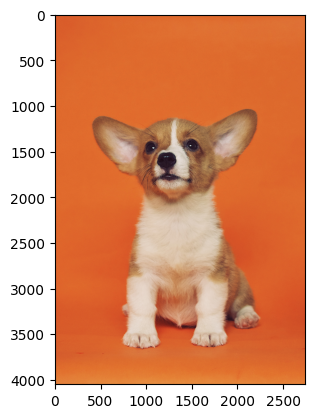

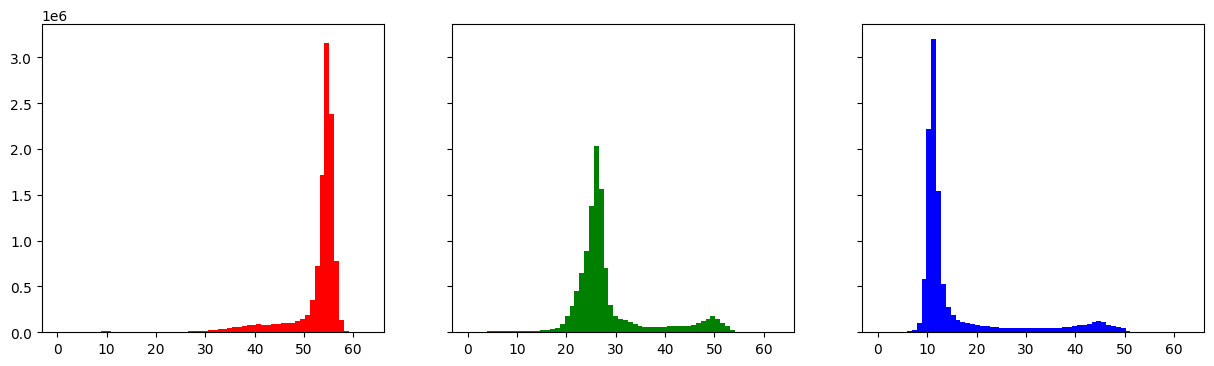

In [121]:
# there is little variation in color here, shown by the isolated spikes
build_histogram(images[5], 64)

That demonstrates color histograms and how we build them. However, there is a better way.

# Build color histograms uing OpenCV Histograms

Building histograms can be abstracted to be done more easily using the OpenCV library. OpenCV has a function called calcHist() specifically for building histograms. calcHist() works on BGR format. We apply it like so:

<img src="hidden\photo6.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />
<img src="hidden\photo7.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

In [122]:
# Create the Red color channel histogram. Take the image called images[5]. [2] refers to for each of its pixels, take the pixel at 3rd channel (R channel). None refers to no mask. [64] refers to divide the histogram x-axis space into 64 regions. [0, 256] refers to the histogram x-axis range
red_hist = cv2.calcHist(
    [images[5]], [2], None, [64], [0, 256]
)

# Create the Green color channel histogram. Take the image called images[5]. [1] refers to for each of its pixels, take the pixel at 2nd channel (G channel). None refers to no mask. [64] refers to divide the histogram x-axis space into 64 regions. [0, 256] refers to the histogram x-axis range
green_hist = cv2.calcHist(
    [images[5]], [1], None, [64], [0, 256]
)

# Create the Red color channel histogram. Take the image called images[5]. [0] refers to for each of its pixels, take the pixel at 1st channel (B channel). None refers to no mask. [64] refers to divide the histogram x-axis space into 64 regions. [0, 256] refers to the histogram x-axis range
blue_hist = cv2.calcHist(
    [images[5]], [0], None, [64], [0, 256]
)

print(f"The shape of the Red color channel histogram = {red_hist.shape}. This means the color histogram x-axis space is divided into {red_hist.shape[0]} regions (represented by {red_hist.shape[0]} discrete values).")
print(f"The shape of the Green color channel histogram = {green_hist.shape}. This means the color histogram x-axis space is divided into {green_hist.shape[0]} regions (represented by {green_hist.shape[0]} discrete values).")
print(f"The shape of the Blue color channel histogram = {blue_hist.shape}. This means the color histogram x-axis space is divided into {blue_hist.shape[0]} regions (represented by {blue_hist.shape[0]} discrete values).")


The shape of the Red color channel histogram = (64, 1). This means the color histogram x-axis space is divided into 64 regions (represented by 64 discrete values).
The shape of the Green color channel histogram = (64, 1). This means the color histogram x-axis space is divided into 64 regions (represented by 64 discrete values).
The shape of the Blue color channel histogram = (64, 1). This means the color histogram x-axis space is divided into 64 regions (represented by 64 discrete values).


After calculating these histogram values, we can visualize them again using plot.

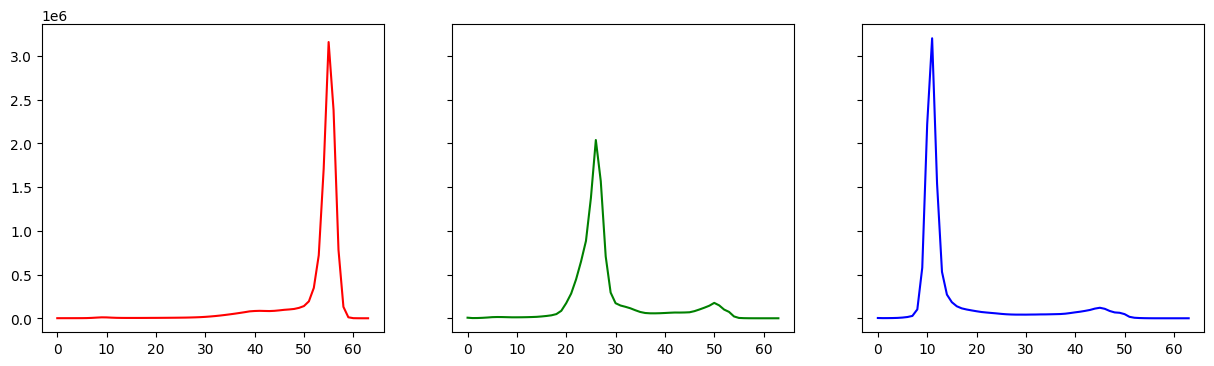

In [123]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True) # create a 1x3 subplot
axs[0].plot(red_hist, color='r') # plot the red color channel histogram
axs[1].plot(green_hist, color='g') # plot the green color channel histogram
axs[2].plot(blue_hist, color='b') # plot the blue color channel histogram
plt.show() # plot the 1x3 subplot

The calcHist function has effectively performed the same operation but with much less code. We now have our histograms; however, we’re not done yet.

# Vectors and Similarity

We have a function for transforming our images into three vectors representing the three color channels. Before comparing our images, we must concatenate these three vectors into a single vector. We will pack all of this into get_vector():

In [124]:
def get_vector(image, bins=32):
    # Calculate the histogram values for the red color channel
    red = cv2.calcHist(
        [image], [2], None, [bins], [0, 256]
    )
    # Calculate the histogram values for the green color channel
    green = cv2.calcHist(
        [image], [1], None, [bins], [0, 256]
    )
    # Calculate the histogram values for the blue color channel
    blue = cv2.calcHist(
        [image], [0], None, [bins], [0, 256]
    )
    # Concatenate the histogram values of all color channel side-by-side into a single row (vector)
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

Verify get_vector() by using it to concatenate histogram values of 3 channels of an image

In [125]:
vec = get_vector(images[0])
print(f"The image called images[0] has {vec.shape[0]} histogram values, arranged as a column in the variable vec.\nThis is because each histogram x-axis space is divided into 32 regions (represented by 32 discrete values).\nSince the image has 3 color channels, the image has 3*32={vec.shape[0]} histogram values.")

The image called images[0] has 96 histogram values, arranged as a column in the variable vec.
This is because each histogram x-axis space is divided into 32 regions (represented by 32 discrete values).
Since the image has 3 color channels, the image has 3*32=96 histogram values.


Using get_vector() to concatenate histogram values of 3 channels of each remainder image in our dataset

In [126]:
# and do the same for all of our images in the dataset
image_vectors = [] # create an empty list
for image in images:
    image_vectors.append(get_vector(image)) # append the concatenated 3-channel histogram values of each image in our datset into the variable called image_vectors in column manner.

<img src="hidden\photo8.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

In [127]:
# cosine similarity
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

<img src="hidden\photo10.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />

1) Explanation of argpartition(): <br />
    1) <img src="hidden\photo9.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [128]:
# Flip the color channels of each image in the dataset (from BGR format to RGB format)
rgb_images = np.array([np.flip(image, 2) for image in images])

# idx is the column index that represents the corresponding image as the query image
def search(idx, top_k=5):
    query_vector = image_vectors[idx] # get the histogram values of the query image
    distances = [] # create an empty list
    for _, vector in enumerate(image_vectors): # at each iteration, vector represents the historgram values of an image
        distances.append(cosine(query_vector, vector)) # compute the cosine similarity between the query image and each image in the dataset (using histogram values of each image), then store the result in the variable distances
    # get top_k most similar images
    top_idx = np.argpartition(distances, -top_k)[-top_k:]
    return top_idx # The last image in top_idx is the most similar image, the first image in top_idx is the least similar image (out of the top_k images)

c:\Users\weiyo\anaconda3\envs\GPUEnv\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


# Define a function to visualize the query image and its top 5 similar images

In [129]:
def visualize(query_i, results_i):
    query = rgb_images[query_i]
    span = int(len(image_vectors[0])/3) # get the size of the elements that describes each color histogram of an image (Let's say an image has 30 elements to describe 3 color histograms, each color histogram is described using a size of 30/3=10 elements, and span=10 for this example)
    results = rgb_images[results_i]
    top_k = len(results)
    # visualize query image and its color histogram
    fig, axs = plt.subplots(1, 2, figsize=(18,10))
    axs[0].imshow(query)
    axs[0].axis('off')
    axs[1].plot(image_vectors[query_i][:span], 'r', label='red')
    axs[1].plot(image_vectors[query_i][span:span*2], 'g', label='green')
    axs[1].plot(image_vectors[query_i][span*2:span*3], 'b', label='blue')
    plt.show()
    # visualize top k images and their color histogram respectively
    fig0, axs0, = plt.subplots(1, top_k, figsize=(top_k*5, 5))
    fig1, axs1, = plt.subplots(1, top_k, figsize=(top_k*5, 5), sharey=True)
    for i in range(top_k):
        axs0[i].imshow(results[i])
        axs0[i].axis('off')
        axs1[i].plot(image_vectors[results_i[i]][:span], 'r', label='red')
        axs1[i].plot(image_vectors[results_i[i]][span:span*2], 'g', label='green')
        axs1[i].plot(image_vectors[results_i[i]][span*2:span*3], 'b', label='blue')

# Take a query image, then retrieve the top 5 similar images to that query image

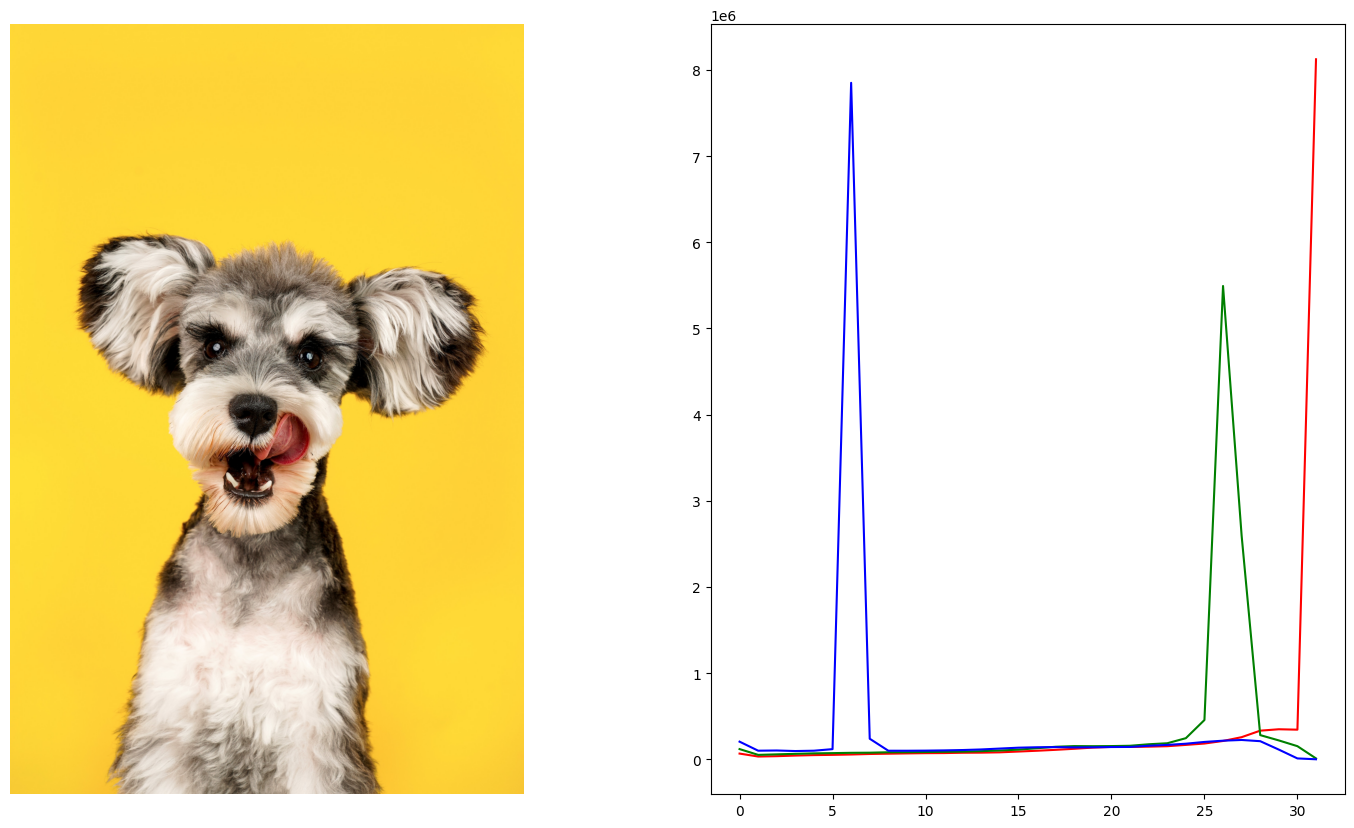

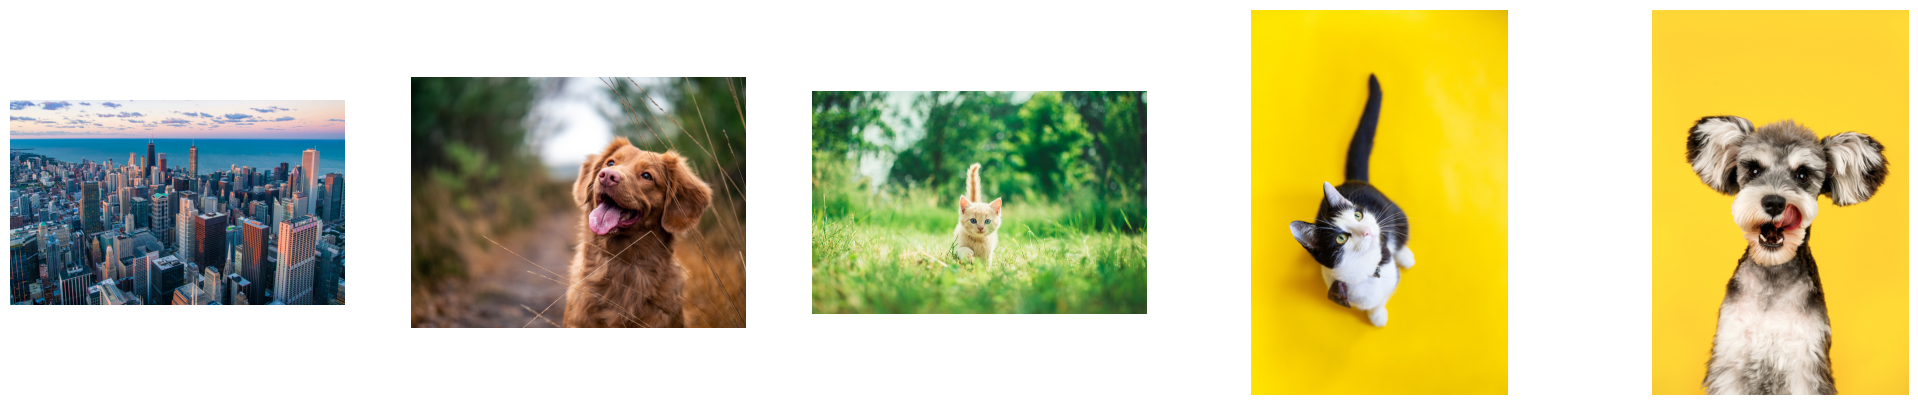

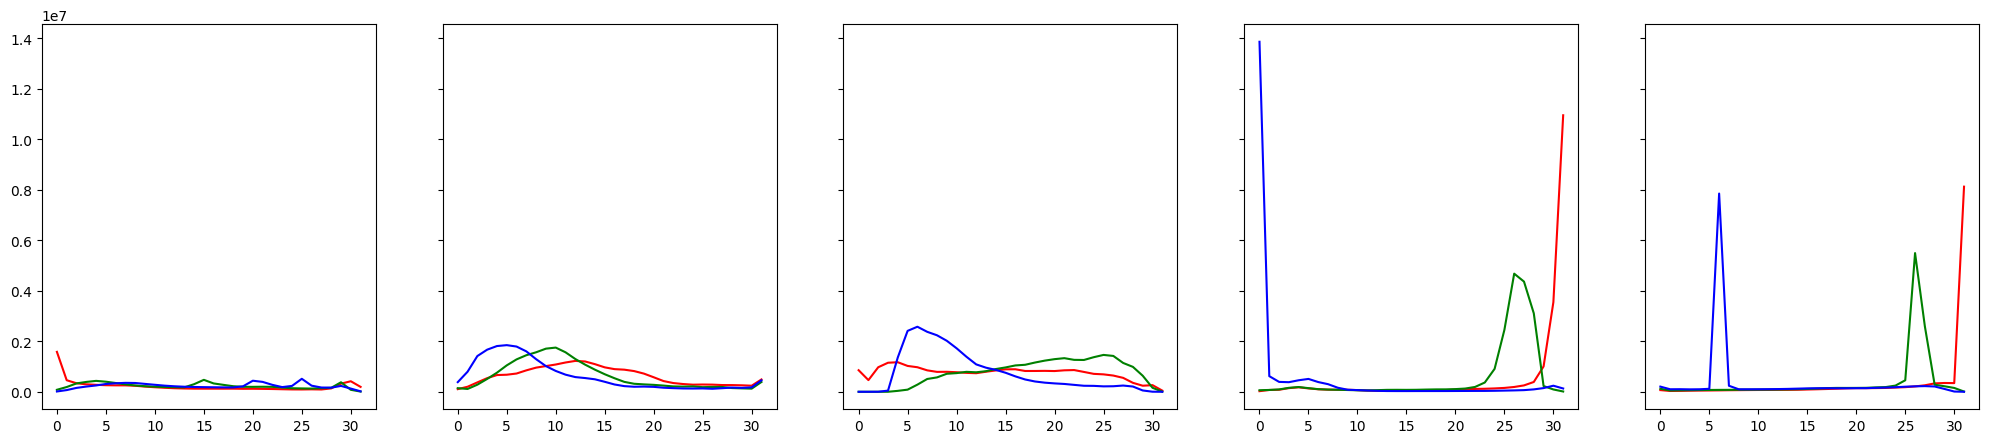

In [130]:
# Choose a query image
query_img = 10
visualize(query_img, search(query_img))

# Insights:

<img src="hidden\photo11.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />
<img src="hidden\photo12.png" alt="This image is a representation of the simple neural network" style="width: 1000px;"/>  <br />